## Tehtävä: Opiskelijaryhmän tiedot
* **Kaikkien ryhmään** kuuluvien opiskelijoiden nimet ja JAMK:n opiskelijatunnukset
    * TODO: Timo Laakkonen + AA4598
    
#### Tehtävien pisteytys

* Opintojakson opettaja laskee pisteet palautuksen jälkeen
* Alla kootusti tehtävien maksimipistemäärät

| Teht. 3 | Teht. 4 | Yhteensä |
|---------|---------|----------|
| 5p      | 5p      | max. 10p |

--------------------



# Tehtävä 5: Datan valmistelu (esikäsittely)


* Miten valmistelet datan?
* Mitä piirteitä tai muuttujia erotat datasta jatkokäsittelyä varten?
* Voidaanko jotakin jättää datasta pois?
* Millainen rakenne datassa on?
* Millainen dataformaatti on kyseessä?
* Kannattaako data pilkkoa osiin?
* Joudutaanko dataa mahdollisesti muuttamaan ennen sen jatkojalostusta?
* Mieti tilastotietojen hyötykäyttöä?
* Havaintojen tueksi voi liittää kuvia datasta

### Tehtävä 5: Vastaus 


### 5.1 * Miten valmistelet datan?

Riippuen missä muodossa data on saatavissa, mahd. reshape ja saatettava sellaiseen muotoon, että 
se on luettavissa/asetettavissa Pandas Dataframeen.
Tarkastetaan datan eheys.
Tarkastetaan NaN, jos löytyy niin mietitään mitä tehdään, mahd. interpolaatio.
Tarkastetaan myös muut mahd. virheet, poikkeamat yms. 
Poistetaan tapauskohtaisesti turhia sarakkeita.
Tapauksesta johtuen -1.0 arvot joko asetetaan 0:ksi tai poistetaan kokonaan datasetistä.
Loopuksi data tulee muuntaa datan mallinnusta varten tarvittavaan muotoon.

In [13]:
import pandas as pd
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
df2.replace(-1, 0, inplace=True)
display(df2)
# NaN kenttiä koko datassa
print(f"Tyhjiä soluja/puuttuvia arvoja: {df.isna().sum().sum()}")
# rivejä
print(f"Rivejä: {df.shape[0]}") #df.index.size
# sarakkeita 
print(f"Sarakkeita: {df.shape[1]}") # len(df.columns)
# kiintestökohtaisia sarakkeita
count=len(df2.columns)-6
print(f"Kiinteistöjä: {count}")

,date,1,2,3,5,6,7,8,10,11,...,2154,2155,2156,2157,2158,Year,Month,Day,Week,Weekday
0,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2012,1,1,52,Sun
1,2012-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2012,1,2,1,Mon
2,2012-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2012,1,3,1,Tue
3,2012-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2012,1,4,1,Wed
4,2012-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2012,1,5,1,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2015,12,27,52,Sun
1457,2015-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2015,12,28,53,Mon
1458,2015-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2015,12,29,53,Tue
1459,2015-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2015,12,30,53,Wed


Tyhjiä soluja/puuttuvia arvoja: 0
Rivejä: 1461
Sarakkeita: 2091
Kiinteistöjä: 2085


### 5.2 * Mitä piirteitä tai muuttujia erotat datasta jatkokäsittelyä varten?
 -1.0 arvot, selvästi poikkeavat arvot, date week yms. jotka tulee poistaa laskennalisista tunnuslujen laskennasta yms. yhteenvedoista
 
### 5.3 * Voidaanko jotakin jättää datasta pois?
tapauskohtaisesti kyllä, esim. data, year, week yms. -1.0 arvot myös tapauskohtaisesti, sekä poikkeukset jotka vääristävät yleistä tilannetta tai sitten tehdään jotakin näille esim. interpolaatio, jolla häivytetään massaan.

### 5.4 * Millainen rakenne datassa on?
taulukko-muotoinen/-tyyppinen yksitasoinen ei sisäkkäisiä rakenteita, rivejä ja sarakkeita, istuu hyvin/suoraan Pandas dataframeen, jonka metodeilla voidaan tehdä mitä halutaan tai osataan

### 5.5 * Millainen dataformaatti on kyseessä?
csv-formatti, erottimena pilkku (,), pandas osaa lukea hyvin.

### 5.6 * Kannattaako data pilkkoa osiin?
Ilman muuta kannattaa jos ei käsitellä koko dataa esim. vain yhden kiinteistön tietoja
Myös silloin kun/jos ajallisesti ei ole tarkoitus käyttää koko dataa niin pilkotaan tarvittavaan osaan.

### 5.7 * Joudutaanko dataa mahdollisesti muuttamaan ennen sen jatkojalostusta?
viitaus 5.2
tämäkin riippuu tapauksesta, poikkeukset pois ja kuten edellä -1.0 arvojen kohtalo, tehtävän kanna.ta turhat pois mm. turhat sarakkeet, poikkeukset häivytetään pois tai täytetään jollakin keskiarvolla tai interpolaatio

### 5.8 * Mieti tilastotietojen hyötykäyttöä?
Tämäkin kysymys (kuten muutama muukin samantapainen) on ollut mutta eri sanoin aikaisemmin.
Kapasiteetin/resurssien riittävyys, säännöstely, kulutustottumuksien tarkkailu. 
Voidaan käyttää mallissa ja tehdä ennustuksia tulevaisuuteen eri aikajaksoina kuten vuosina, kuukausina, viikkoina, viikonpäivinä.

# Tehtävä 6: Datan mallintaminen

## Tehtävä 6: Vastaus 

* Miten mallintaisit datan?
* Millä tavalla päästään haluamaasi lopputavoitteeseen?
* Regressio?
* Ennustaminen?
* Luokittelu?
* Ryhmittely?
* Ryhmien tunnistaminen datasta?
* Mitä tämän jälkeen tapahtuu CRISP-DM -mallin mukaan (pääpiirteissään)
* Havaintojen tueksi voi liittää kuvia/koodia datasta

### * Miten mallintaisit datan?
Käsitteenä datan mallintaminen on laaja ja sitä voidaan katsoa usealta tasolta ja näkökulmasta.
Mallinnuksen avulla homma pysyy ns. hanskassa. Maliinuksen avulla riippuvuussuhteet selviävät/selkeytyvät/vahvistuvat.
Kaiken keskiössä on kuitenkin itse data.
Mitä mallintamisella oikeastaan tarkoitetaan, sen vuoksi seuraavassa 2 täysin erilaista esimerkkiä, joista 
jälkimmäinen vastaa paremmin kysymykseen. 

#### 6.1.1 Mallinnus

Olen tehnyt mallin perustuen kahteen python luokkaan ja Pandas dataframeen. 
Pandas/Dataframe on se varsinainen moottori, jonka metodeissa/funktioissa on hevosvoimia riittävästi suurenkin datamassan käsittelyyn.
Ajatus on se, että luokka muuttujineen ja metodeineen tekee sen mallin (ylimmän kerroksen/rajapinnan) eli määrittää mitä malli pitää sisällään ja kuinka dataa käsitellään, mitä laitetaan sisään ja mitä saadaa ulos. Kysessä siis malli/luokka/kirjasto johonkin tarkoitukseen. Lähtökohta olis se, että ei ole valmista json, csv tai muuta tiedostoa/tietolähdettä, josta data luetaan suoraan DataFameen vaan vain erillisiä päivämäärällä leimattuja kiinteistökohtaisia kulutusarvoja.
Käytänössä datan tallennus tänä päivänä tapahtuu johonkin tietokantaan esim. mongoDB-tietokantaan, johon jo noSQL:llä voidaan tehdä filtteröinti yms. toimenpiteitä niin että data on puhdistettu ja esivalmisteltu valmiiksi. Tirotokannasta data voidaan lukea suoraan json-formaatissa DataFrameen. 
Malli ei välttämättä ole valmis koskaan, vaan se on selkäranka, mallia päivitetään, kehitetään, laajennetaan, parannellaan tarpeen mukaan, ja datasta syntyy uutta dataa ja uusia näkemyksiä.

,date,163,Day,Month,Week,Weekday,Year,55,11,12,16,63,99
0,2022-05-13,5.64,13,5,19,Fri,2022,3.75,5.64,NaN,NaN,NaN,NaN
1,2022-05-14,4.92,14,5,19,Sat,2022,2.65,NaN,4.92,NaN,NaN,NaN
2,2022-05-15,3.25,15,5,19,Sun,2022,2.00,NaN,NaN,NaN,NaN,NaN
3,2022-05-16,3.25,16,5,20,Mon,2022,1.14,NaN,NaN,3.25,NaN,NaN
4,2022-05-17,5.03,17,5,20,Tue,2022,2.43,NaN,NaN,NaN,5.03,NaN
5,2022-05-18,4.69,18,5,20,Wed,2022,2.69,NaN,NaN,NaN,NaN,4.69


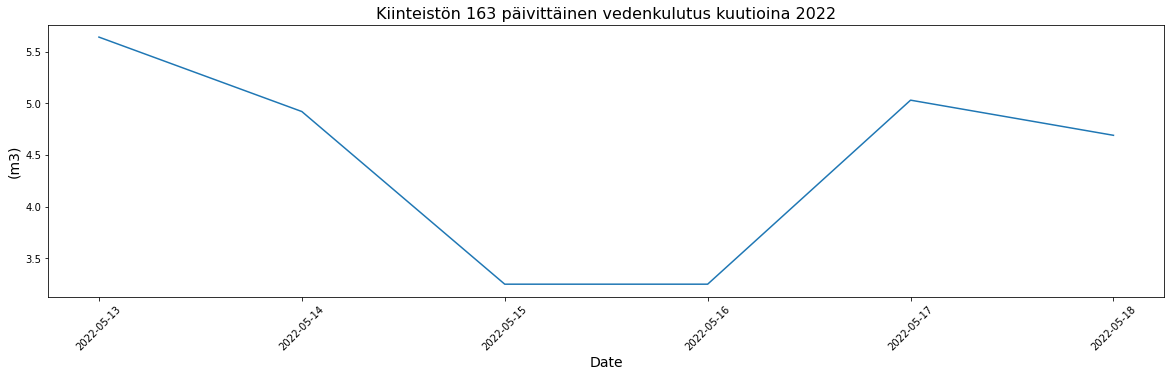

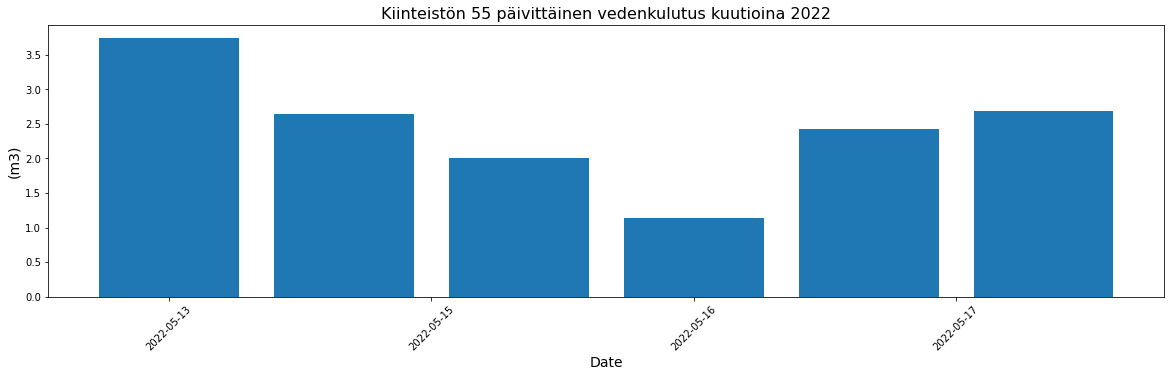

,date,163,Day,Month,Week,Weekday,Year
0,2012-09-13,5.64,13,9,37,Thu,2012
1,2012-09-16,3.25,16,9,37,Sun,2012


In [52]:
#['date','house' 'Year','Month', 'Day', 'Week', 'Weekday']
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# jotta parametriin perustuen voidaan muodostaa parametrin niminen sarake 
# taikatempun mahdollistaa eräänaiset setter ja getter metodit __setitem__ ja __getitem__
class MeasuredData():
    def __init__(self, pvm,house, value):
        days=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']        
        date = datetime.datetime.strptime(pvm, "%Y-%m-%d")
        # tee setterit/getterit,tsekkaa arvoje oikeellisuus 
        #esim. date on tyyiltään date, house on number, value on number/float        
        self.date = pvm 
        self[house] = value
        self.Year=str(date.year)
        self.Month=str(date.month)
        self.Day=str(date.day)
        self.Week=str(date.isocalendar()[1])
        self.Weekday=days[int(date.isocalendar()[2])-1]
        
    def __setitem__(self, key, value):
        setattr(self, key, value)

    def __getitem__(self, key):
        return getattr(self, key)
  
class Prog():
    def __init__(self):        
        self.df = pd.DataFrame(columns = ['date'])
    #ei tarkisteta/ilmoiteta jos data on jo, korvataan vanha uudella
    def reset(self):
        self.df = pd.DataFrame(columns = ['date'])
        
    def add(self,date,house,value):        
        find=self.df.loc[self.df['date']==date]
        
        if find.index.size==0:
            data = MeasuredData(date,house,value)
            new_row = pd.Series(vars(data))
            self.df = self.df.append(new_row, ignore_index=True)
        else:
            self.df.loc[find.index,[house]] = value
            
    def printOut(self,house):
        if house=='':
            display(self.df)
        else:            
            display(self.df[house])
    # esimerkkinä tulostetaan kaikki kiinteistön data        
    def chartOut(self,bar,house,year,txt):
        
        self.df.replace(float('NaN'), 0, inplace=True)
        fig, axs = plt.subplots(1, 1, sharey=True, gridspec_kw={'hspace': 0.4}, figsize=(20, 5))

        if not bar:
            if year!="":            
                axs.plot(self.df['date'][(self.df['Year'] == str(year))],
                        self.df[house][(self.df['Year'] == str(year))])            
                axs.set_title(f"Kiinteistön {house} päivittäinen vedenkulutus kuutioina {year}",size=16)
            else:
                axs.plot(self.df['date'],self.df[house])
                axs.set_title(f"Kiinteistön {house} päivittäinen vedenkulutus kuutioina {txt}",size=16)
        else: 
            if year!="":            
                axs.bar(self.df['date'][(self.df['Year'] == str(year))],
                        self.df[house][(self.df['Year'] == str(year))])            
                axs.set_title(f"Kiinteistön {house} päivittäinen vedenkulutus kuutioina {year}",size=16)
            else:
                axs.bar(self.df['date'],self.df[house])
                axs.set_title(f"Kiinteistön {house} päivittäinen vedenkulutus kuutioina {txt}",size=16)            
            
        axs.set_ylabel('(m3)', size=14)
        axs.set_xlabel('Date', size=14)
        axs.xaxis.set_major_locator(plt.MaxNLocator(len(self.df['date'])))        
        axs.tick_params(axis='x', rotation=45)
        plt.show()        
                        
app=Prog()
app.add('2022-05-13', '163',5.64)
app.add('2022-05-14', '163',4.92)
app.add('2022-05-15', '163',3.25)
app.add('2022-05-16', '163',3.25)
app.add('2022-05-17', '163',5.03)
app.add('2022-05-18', '163',4.69)

app.add('2022-05-13', '55',3.75)
app.add('2022-05-13', '11',5.64)
app.add('2022-05-14', '12',4.92)
app.add('2022-05-15', '55',2.00)
app.add('2022-05-16', '16',3.25)
app.add('2022-05-17', '63',5.03)
app.add('2022-05-18', '99',4.69)
app.add('2022-05-18', '55',2.69)
app.add('2022-05-17', '55',2.43)
app.add('2022-05-16', '55',1.14)
app.add('2022-05-14', '55',2.65)

app.printOut('')
app.chartOut(False,'163',2022,'')
app.chartOut(True,'55',2022,'')

app.reset()
app.add('2012-09-13', '163',5.64)
app.add('2012-09-16', '163',3.25)
app.printOut('')

#### 6.1.2. Mallinnus
Tässä mallinnukseen on käytetty lineaarista regressiota. Se on ymmärrykseni mukaan ihan hyvä tähän esimerkin dataan ja sen luonteeseen nähden.
Tässä pitää huomioida kiinteistö 163 jonka pudotin kokonaan pois koska sen kulutus oli suuruudeltaan niin suurta, että se olisi vääristänyt todelisuutta kun ajatellaan kokonaisuutta ja yleistetään. Oikeastaan voisi poistaa enemmänkin poikkeuksia 
(kappale 4.4.2).

##### Parametrina annettuun vuoteen perustuva lähdeaineisto, ennustus parametrina saatuun kuukauteen (kuukausi ennuste)

     Actual  Predicted
0  1.182386   1.144311
1  1.217566   1.258919
2  1.183109   1.098467
Mean Absolute Error: 0.054690075155641026
Mean Squared Error: 0.00344134086604779
Root Mean Squared Error: 0.058662942868967886

Ennuste kiinteistöjen kuukauden 3 keskimääräiselle kulutukselle perustuen vuoden 2012 aineistoon: 
1.0526239215426754,  graafiin arvo on merkattu oranssin värisellä markkerilla.


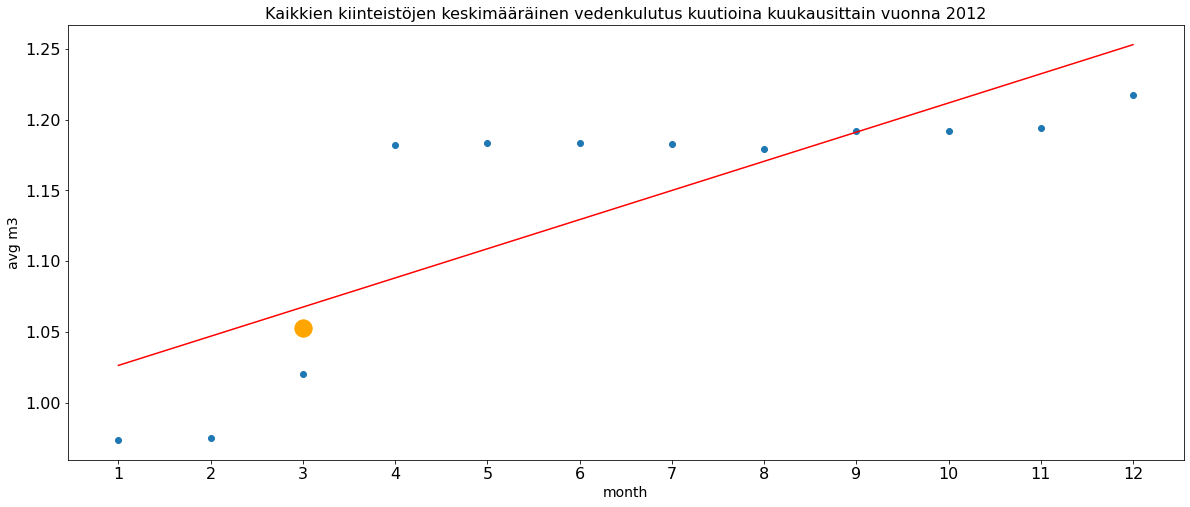

     Actual  Predicted
0  1.203684   1.264952
1  1.304185   1.367262
2  1.183472   1.224028
Mean Absolute Error: 0.054966834168574286
Mean Squared Error: 0.0031257340508421497
Root Mean Squared Error: 0.05590826460231215

Ennuste kiinteistöjen kuukauden 11 keskimääräiselle kulutukselle perustuen vuoden 2013 aineistoon: 
1.346799823823207,  graafiin arvo on merkattu oranssin värisellä markkerilla.


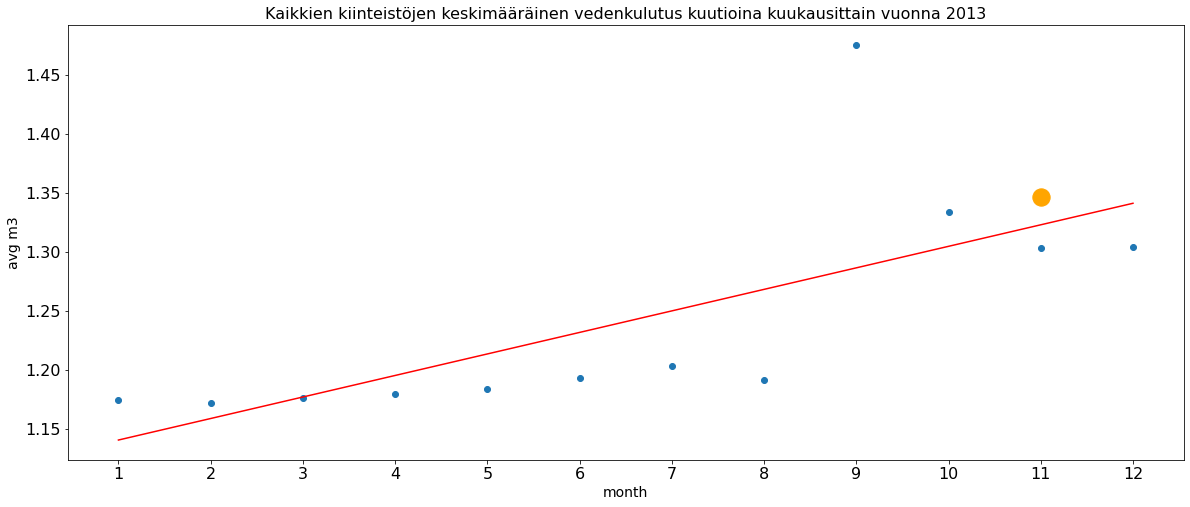

     Actual  Predicted
0  1.302190   1.398088
1  1.829383   1.541119
2  1.288425   1.340876
Mean Absolute Error: 0.1455373538750245
Mean Squared Error: 0.03168108309172732
Root Mean Squared Error: 0.17799180624884764

Ennuste kiinteistöjen kuukauden 6 keskimääräiselle kulutukselle perustuen vuoden 2014 aineistoon: 
1.3694821552165548,  graafiin arvo on merkattu oranssin värisellä markkerilla.


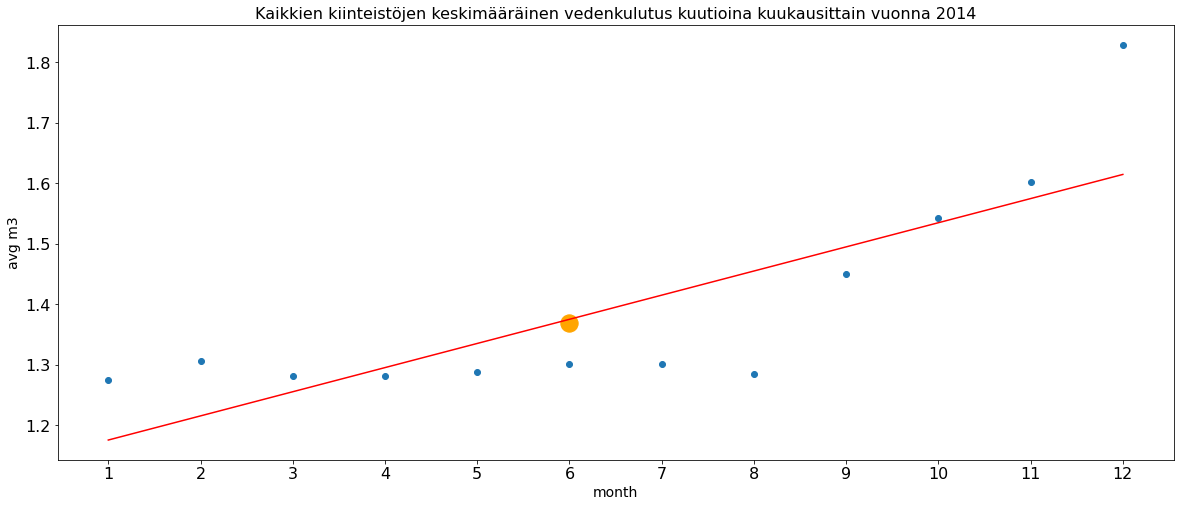

     Actual  Predicted
0  0.989943   1.168433
1  1.002812   0.755320
2  0.984798   1.333678
Mean Absolute Error: 0.2582875697110603
Mean Squared Error: 0.07160952577524056
Root Mean Squared Error: 0.2675995623599571

Ennuste kiinteistöjen kuukauden 9 keskimääräiselle kulutukselle perustuen vuoden 2015 aineistoon: 
1.0031876366687722,  graafiin arvo on merkattu oranssin värisellä markkerilla.


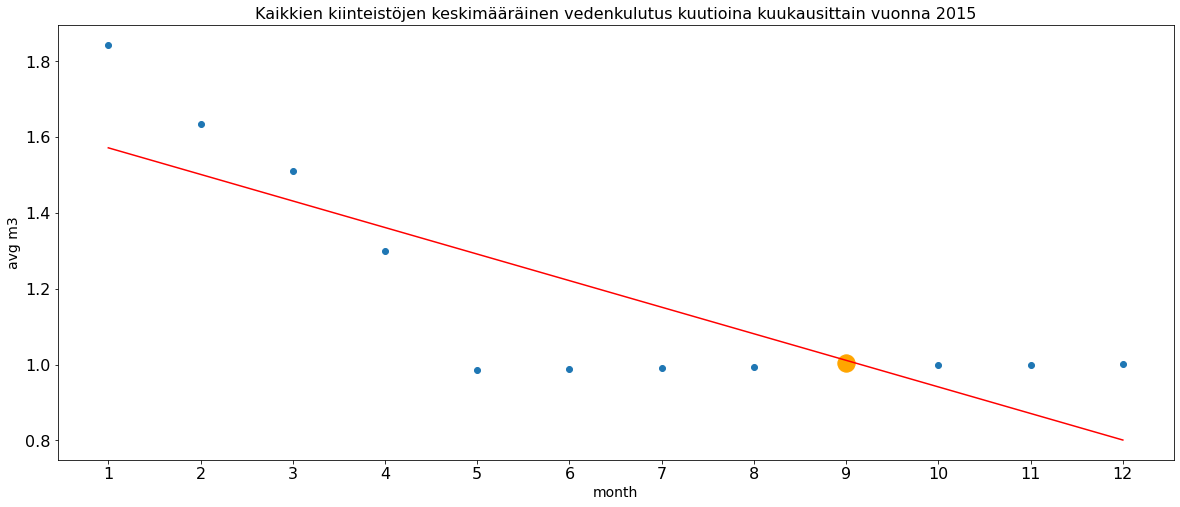

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
#----------------
df2.drop('163', axis=1, inplace=True)
#----------------
df2.replace(-1, 0, inplace=True) 

years=list((range(2012,2015+1))) ## oikeammin oliis filtteröidä eri vuodeT aineistostA

months=list(range(1,13))

def prog(year,month):
    def getMonthData(year):
        monthData=[]
        for month in months:
            data=df2.loc[(df2['Month'] == month) & (df2['Year'] == int(year))]                
            monthData.append(data.mean(numeric_only=True,axis=0).mean()) 
        return monthData
    
    
    x = np.array(months)
    y = np.array(getMonthData(year))

    fig1, ax = plt.subplots(1, 1, sharey=True,figsize=(20, 8))
    ax.xaxis.set_major_locator(plt.MaxNLocator(len(months)+1))

    ax.set_xlabel('month', size=14)
    ax.set_ylabel('avg m3', size=14)
    ax.set_title(f"Kaikkien kiinteistöjen keskimääräinen vedenkulutus kuutioina kuukausittain vuonna {year}",size=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.scatter(months, y)

    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b,color='red')
    
    mArray = np.array(months)
    X = mArray.reshape(-1, 1)
    y = getMonthData(year)

    # jakaminen koulutus- ja testisarjoihin
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # algoritmin koulutus
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    #print(regressor.intercept_)
    #print(regressor.coef_)
    
    # ennustaminen
    y_pred = regressor.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(df)
    from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
     
    X = [[month]]
    value=regressor.predict(X)
    
    print()
    print(f"Ennuste kiinteistöjen kuukauden {month} keskimääräiselle kulutukselle perustuen vuoden {year} aineistoon: ")        
    print(f"{value[0]}, graafiin arvo on merkattu oranssin värisellä markkerilla.")
    ax.scatter(X[0], value,color='orange',s=300)
    plt.show()

# ennustetaan    
# parametrina vuosi ja kuukauden järjestysnumero    
prog(2012,3)
prog(2013,11)
prog(2014,6)
prog(2015,9)

##### Lähdeaineistona vuosien 2012-2015 data, ennustus parametrina saatuun kuukauteen (kuukausi ennuste)
Edellä aineisto josta ennustetaan oli jonkin yhden vuoden aineisto (2012 - 2015), seuraavassa aineisto perustuu 
koko aikajakson 2012 - 2015 keskimääräisiin kuukausikulutuksiin.

     Actual  Predicted
0  1.169551   1.243946
1  1.338487   1.230655
2  1.159951   1.249262
Mean Absolute Error: 0.09051271671060634
Mean Squared Error: 0.008379602147045058
Root Mean Squared Error: 0.09154016685065118

Ennuste kiinteistöjen kuukauden 3 keskimääräiselle kulutukselle perustuen vuosien 2012-2015 aineistoon: 
1.2545788808852731, graafiin arvo on merkattu magentan värisellä markkerilla.


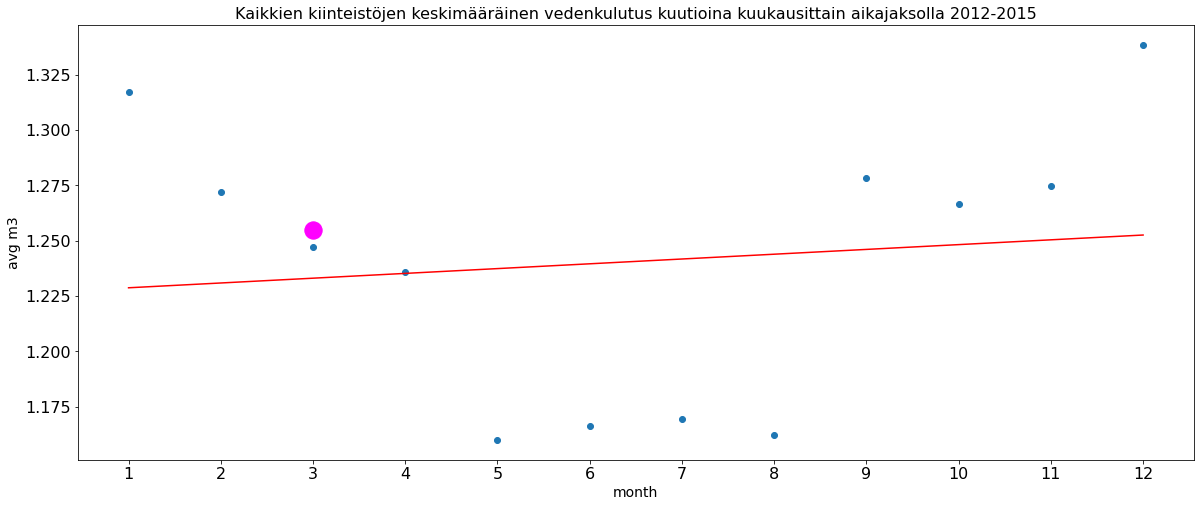

     Actual  Predicted
0  1.169551   1.243946
1  1.338487   1.230655
2  1.159951   1.249262
Mean Absolute Error: 0.09051271671060634
Mean Squared Error: 0.008379602147045058
Root Mean Squared Error: 0.09154016685065118

Ennuste kiinteistöjen kuukauden 11 keskimääräiselle kulutukselle perustuen vuosien 2012-2015 aineistoon: 
1.2333132635412933, graafiin arvo on merkattu magentan värisellä markkerilla.


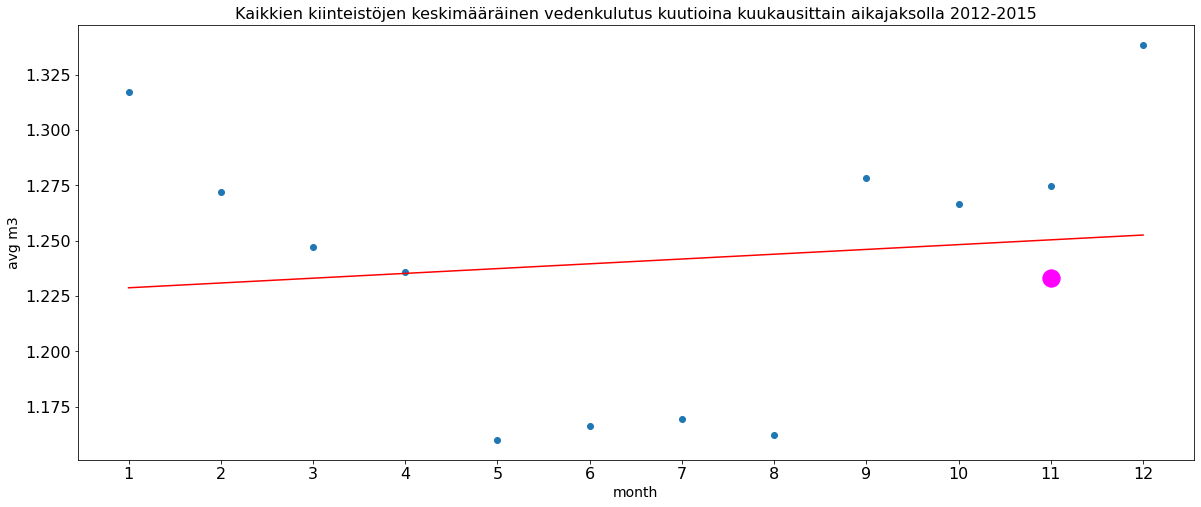

     Actual  Predicted
0  1.169551   1.243946
1  1.338487   1.230655
2  1.159951   1.249262
Mean Absolute Error: 0.09051271671060634
Mean Squared Error: 0.008379602147045058
Root Mean Squared Error: 0.09154016685065118

Ennuste kiinteistöjen kuukauden 6 keskimääräiselle kulutukselle perustuen vuosien 2012-2015 aineistoon: 
1.2466042743812806, graafiin arvo on merkattu magentan värisellä markkerilla.


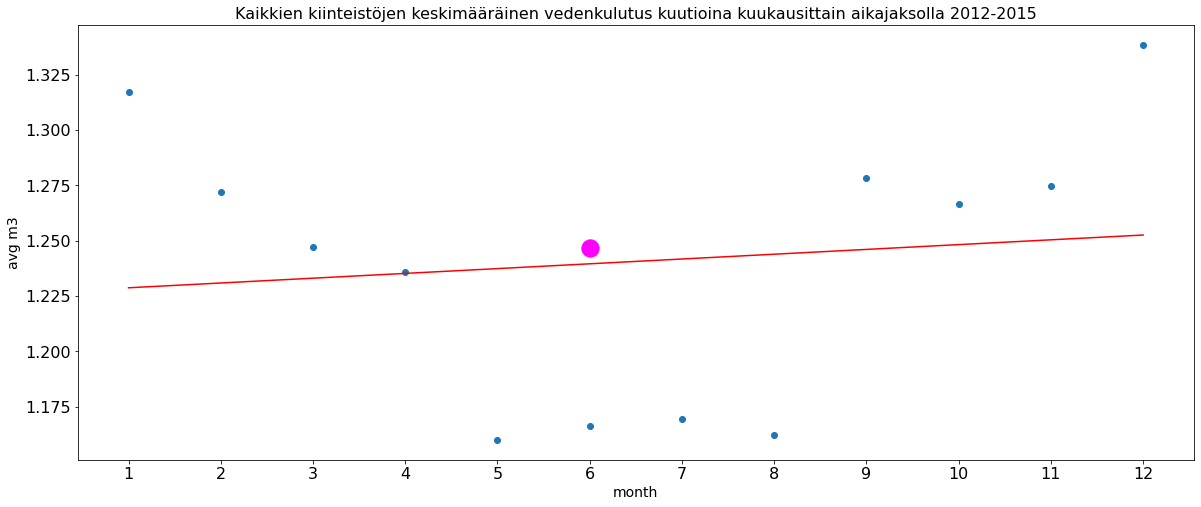

     Actual  Predicted
0  1.169551   1.243946
1  1.338487   1.230655
2  1.159951   1.249262
Mean Absolute Error: 0.09051271671060634
Mean Squared Error: 0.008379602147045058
Root Mean Squared Error: 0.09154016685065118

Ennuste kiinteistöjen kuukauden 9 keskimääräiselle kulutukselle perustuen vuosien 2012-2015 aineistoon: 
1.2386296678772883, graafiin arvo on merkattu magentan värisellä markkerilla.


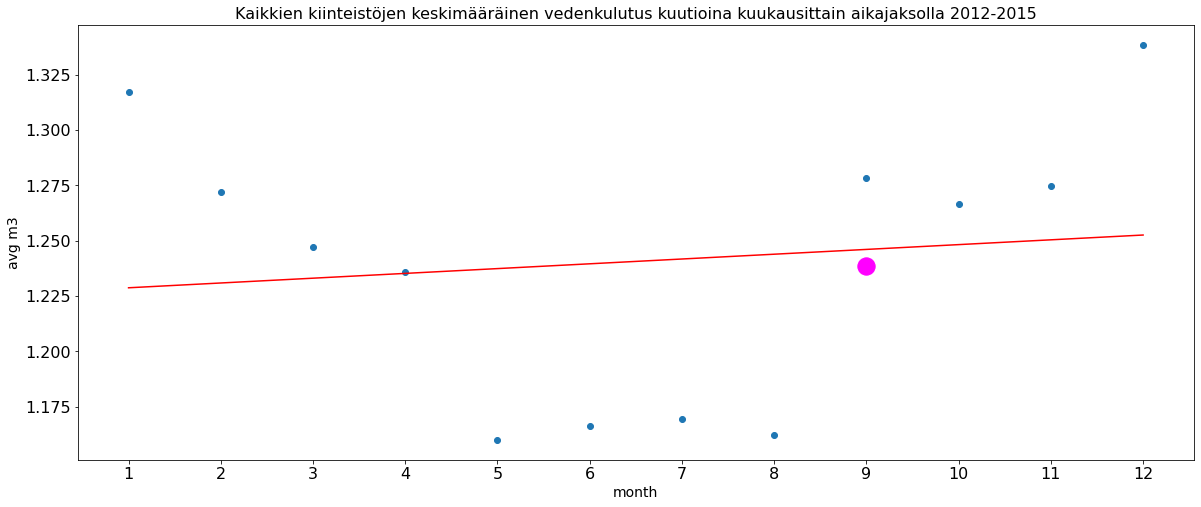

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
#----------------
df2.drop('163', axis=1, inplace=True)
#----------------
df2.replace(-1, 0, inplace=True) 

years=list((range(2012,2015+1))) ## oikeammin oliis filtteröidä eri vuodeT aineistostA

months=list(range(1,13))
def prog(month):
    
    def getMonthData():
        
        monthData=[]
                
        for ind in range(0,len(years)):            
            monthData.append([])    
            for month in months:
                data=df2.loc[(df2['Month'] == month) & (df2['Year'] == int(years[ind]))]                
                monthData[ind].append(data.mean(numeric_only=True,axis=0).mean()) 
                
        monthData=np.mean(monthData, axis=0) 

        return monthData
            
    x = np.array(months)
    y = np.array(getMonthData())

    fig1, ax = plt.subplots(1, 1, sharey=True,figsize=(20, 8))
    ax.xaxis.set_major_locator(plt.MaxNLocator(len(months)+1))

    ax.set_xlabel('month', size=14)
    ax.set_ylabel('avg m3', size=14)
    ax.set_title(f"Kaikkien kiinteistöjen keskimääräinen vedenkulutus kuutioina kuukausittain aikajaksolla {years[0]}-{years[len(years)-1]}",size=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.scatter(months, y)

    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b,color='red')
    
    mArray = np.array(months)
    X = mArray.reshape(-1, 1)
    y = getMonthData()

    # jakaminen koulutus- ja testisarjoihin
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # algoritmin koulutus
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    #print(regressor.intercept_)
    #print(regressor.coef_)
    
    # ennustaminen
    y_pred = regressor.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(df)
    from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
     
    X = [[month]]
    value=regressor.predict(X)
    
    print()
    print(f"Ennuste kiinteistöjen kuukauden {month} keskimääräiselle kulutukselle perustuen vuosien {years[0]}-{years[len(years)-1]} aineistoon: ")        
    print(f"{value[0]}, graafiin arvo on merkattu magentan värisellä markkerilla.")
    ax.scatter(X[0], value,color='magenta',s=300)
    plt.show()

# ennustetaan    
# parametrina kuukauden järjestysnumero
prog(3)
prog(11)
prog(6)
prog(9)

##### Lähdeaineistona vuosien 2012-2015 data, ennustus parametrina saatuun viikkonumeroon (viikko ennuste)

      Actual  Predicted
0   1.171126   1.246779
1   1.319569   1.252327
2   1.230451   1.236300
3   1.170940   1.250478
4   1.325271   1.230752
5   1.160004   1.248012
6   1.259591   1.254176
7   1.161525   1.249245
8   1.164867   1.245546
9   1.315439   1.231985
10  1.239367   1.235683
Mean Absolute Error: 0.061069144335128715
Mean Squared Error: 0.004954198164924809
Root Mean Squared Error: 0.07038606513312709

Ennuste kiinteistöjen viikon 40 keskimääräiselle kulutukselle perustuen vuosien 2012-2015 aineistoon: 
1.2535600580008848, graafiin arvo on merkattu vihreän (lime) värisellä markkerilla.


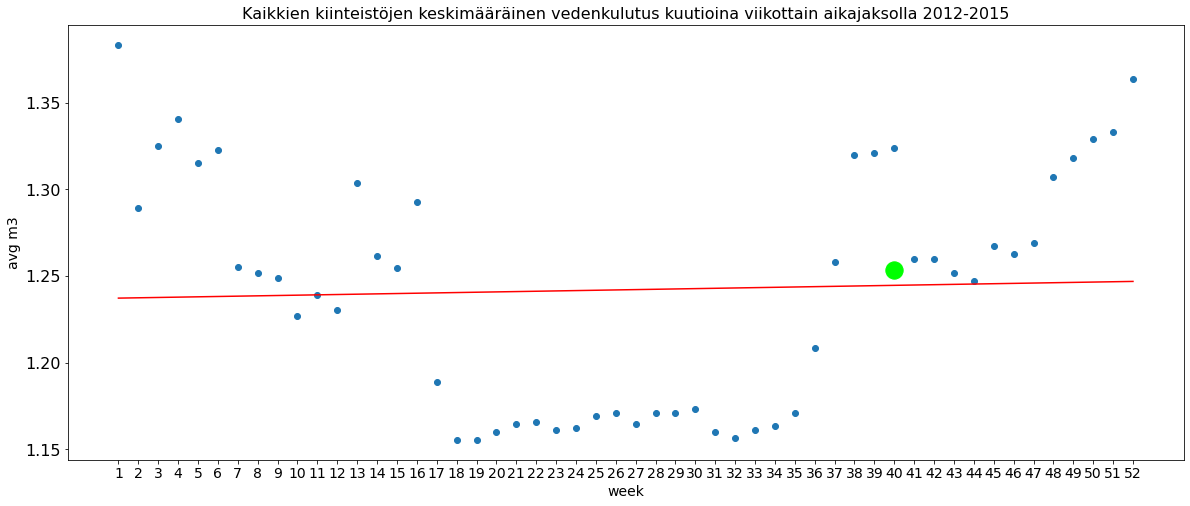

      Actual  Predicted
0   1.171126   1.246779
1   1.319569   1.252327
2   1.230451   1.236300
3   1.170940   1.250478
4   1.325271   1.230752
5   1.160004   1.248012
6   1.259591   1.254176
7   1.161525   1.249245
8   1.164867   1.245546
9   1.315439   1.231985
10  1.239367   1.235683
Mean Absolute Error: 0.061069144335128715
Mean Squared Error: 0.004954198164924809
Root Mean Squared Error: 0.07038606513312709

Ennuste kiinteistöjen viikon 11 keskimääräiselle kulutukselle perustuen vuosien 2012-2015 aineistoon: 
1.2356833686273405, graafiin arvo on merkattu vihreän (lime) värisellä markkerilla.


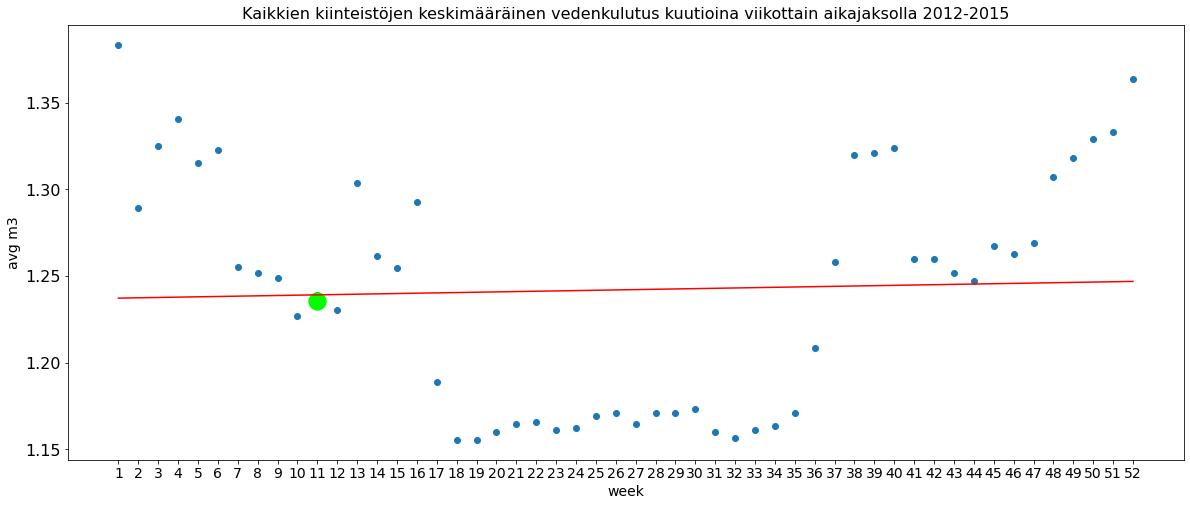

      Actual  Predicted
0   1.171126   1.246779
1   1.319569   1.252327
2   1.230451   1.236300
3   1.170940   1.250478
4   1.325271   1.230752
5   1.160004   1.248012
6   1.259591   1.254176
7   1.161525   1.249245
8   1.164867   1.245546
9   1.315439   1.231985
10  1.239367   1.235683
Mean Absolute Error: 0.061069144335128715
Mean Squared Error: 0.004954198164924809
Root Mean Squared Error: 0.07038606513312709

Ennuste kiinteistöjen viikon 52 keskimääräiselle kulutukselle perustuen vuosien 2012-2015 aineistoon: 
1.2609573087761445, graafiin arvo on merkattu vihreän (lime) värisellä markkerilla.


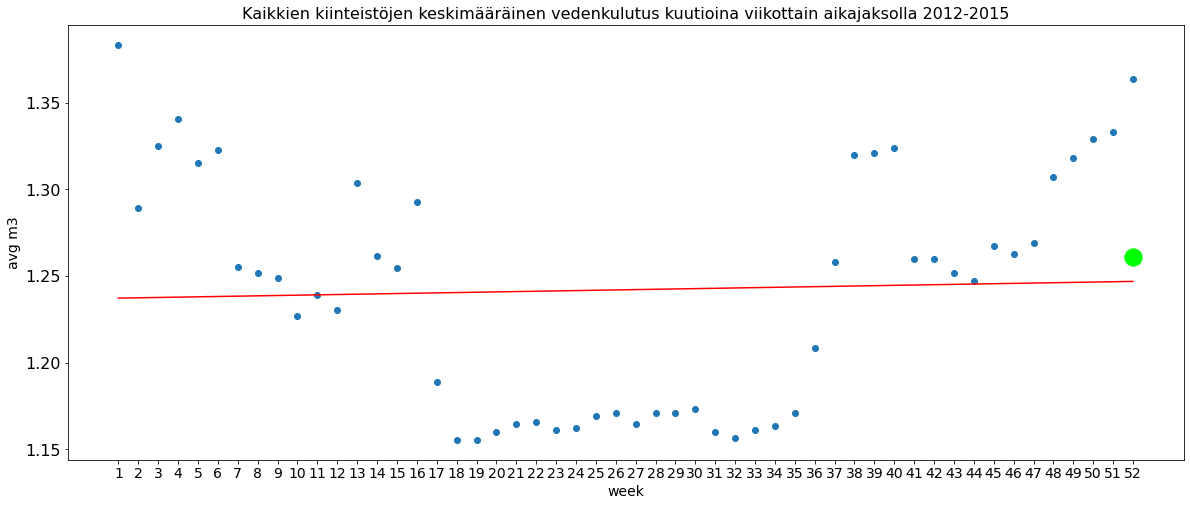

      Actual  Predicted
0   1.171126   1.246779
1   1.319569   1.252327
2   1.230451   1.236300
3   1.170940   1.250478
4   1.325271   1.230752
5   1.160004   1.248012
6   1.259591   1.254176
7   1.161525   1.249245
8   1.164867   1.245546
9   1.315439   1.231985
10  1.239367   1.235683
Mean Absolute Error: 0.061069144335128715
Mean Squared Error: 0.004954198164924809
Root Mean Squared Error: 0.07038606513312709

Ennuste kiinteistöjen viikon 25 keskimääräiselle kulutukselle perustuen vuosien 2012-2015 aineistoon: 
1.2443134945318102, graafiin arvo on merkattu vihreän (lime) värisellä markkerilla.


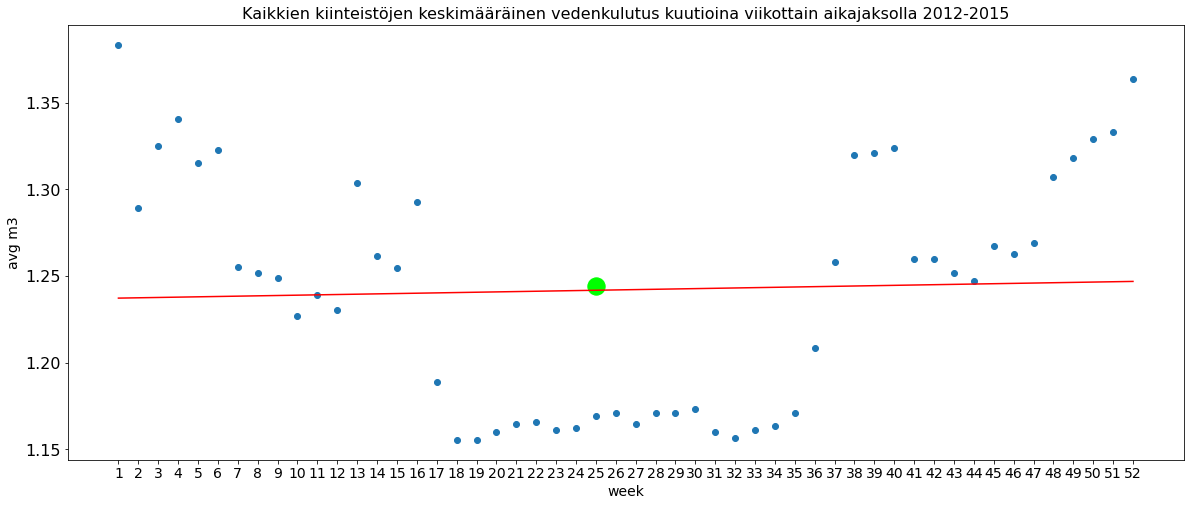

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
#----------------
df2.drop('163', axis=1, inplace=True)
#----------------
df2.replace(-1, 0, inplace=True) 

years=list((range(2012,2015+1)))

weeks=list(range(1,52+1))

def prog(week):
    
    def getWeekData():
        
        weekData=[]
                
        for ind in range(0,len(years)):
            
            weekData.append([])    
            for week in weeks:
                data=df2.loc[(df2['Week'] == week) & (df2['Year'] == int(years[ind]))]                    
                weekData[ind].append(data.mean(numeric_only=True,axis=0).mean()) 
                
        weekData=np.mean(weekData, axis=0) 
   
        return weekData
                
    x = np.array(weeks)
    y = np.array(getWeekData())

    fig1, ax = plt.subplots(1, 1, sharey=True,figsize=(20, 8))
    #ax.xaxis.set_major_locator(plt.MaxNLocator(len(weeks)+1)
    
    ax.set_xticks(weeks)
   
    ax.set_xlabel('week', size=14)
    ax.set_ylabel('avg m3', size=14)
    ax.set_title(f"Kaikkien kiinteistöjen keskimääräinen vedenkulutus kuutioina viikottain aikajaksolla {years[0]}-{years[len(years)-1]}",size=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=16)
    ax.scatter(weeks, y)

    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b,color='red')
    
    mArray = np.array(weeks)
    X = mArray.reshape(-1, 1)
    y = getWeekData()

    # jakaminen koulutus- ja testisarjoihin
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # algoritmin koulutus
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    #print(regressor.intercept_)
    #print(regressor.coef_)
    
    # ennustaminen
    y_pred = regressor.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(df)
    from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
     
    X = [[week]]
    value=regressor.predict(X)
    
    print()
    print(f"Ennuste kiinteistöjen viikon {week} keskimääräiselle kulutukselle perustuen vuosien {years[0]}-{years[len(years)-1]} aineistoon: ")        
    print(f"{value[0]}, graafiin arvo on merkattu vihreän (lime) värisellä markkerilla.")
    ax.scatter(X[0], value,color='lime',s=300)
    plt.show()
    
# ennustetaan    
# parametrina viikon järjestysnumero
prog(40)
prog(11)
prog(52)
prog(25)


#### 6.2 * Millä tavalla päästään haluamaasi lopputavoitteeseen?

Mallia tulee kehittää, jatkuva testaaminen ja kehittäminen, eräänlainen takaisinkytkentä. Tuloksista 
uutta oppimateriaalia toki riippun siitä millaisia tulokset olivat.
Asettamalla riittävä tarkkuus ja iteroimalla testidatalla kunnes saavutetaan riittävä tarkkuus
Ja jos ei saavuteta, otetaan askelia takaisin päin ja tarkastellaan voidaanko jotakin tehdä toisin.
Joskus pitää palata askelissa taaksepäin ja mahd. tarkastella myös esivalmistelua.
Jos kaikesta huolimatta ei päästä tyydyttävn lopputulokseen, on mallia ja mallinnusmetodeja muutettava toisiksi.
 
#### 6.3 * Regressio?
Regressio etsii suhteita muuttujien välillä.
Korrrelaatio melkein sama, mutta kahden muuttujan välillä. 
Tässä tapuksessa sanoisin, että regressio = korrelaatio.
Selvitetään mikä merkitys/korrelaatio on päivämäärällä, kausivaihteluilla, eri aikajaksoilla kulutukseen (kapale 6.1.2)

##### 6.3.1 Seuraavassa selvitetään onko eri kuukaudella ja eri vuotena jotakin erityistä merkitystä kulutukseen



Kaikkien kiinteistöjen kulutuskeskiarvo on 0.17041533236293063 m3


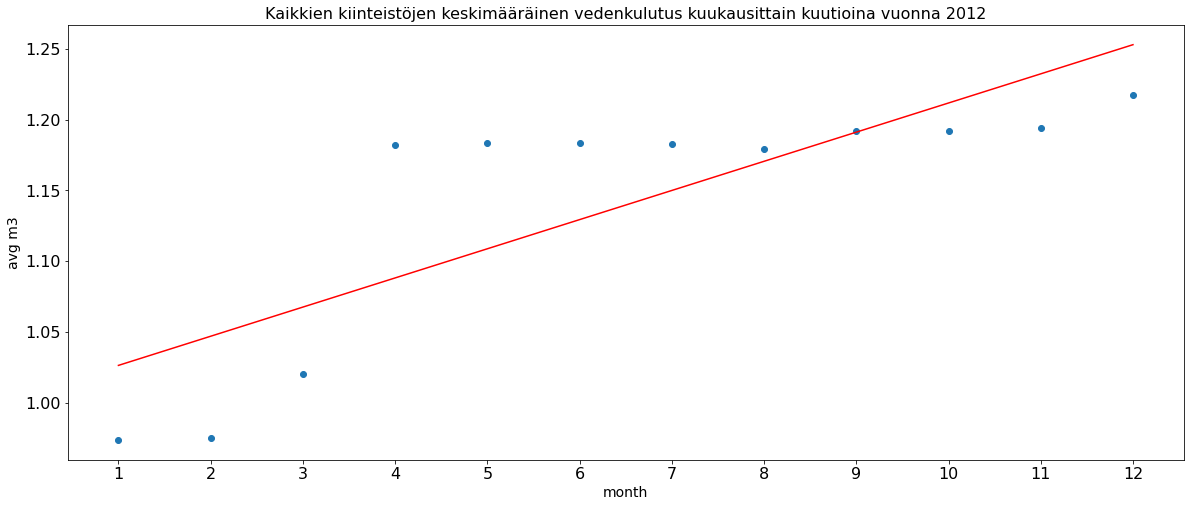

Kaikkien kiinteistöjen kulutuskeskiarvo on 0.17041533236293063 m3


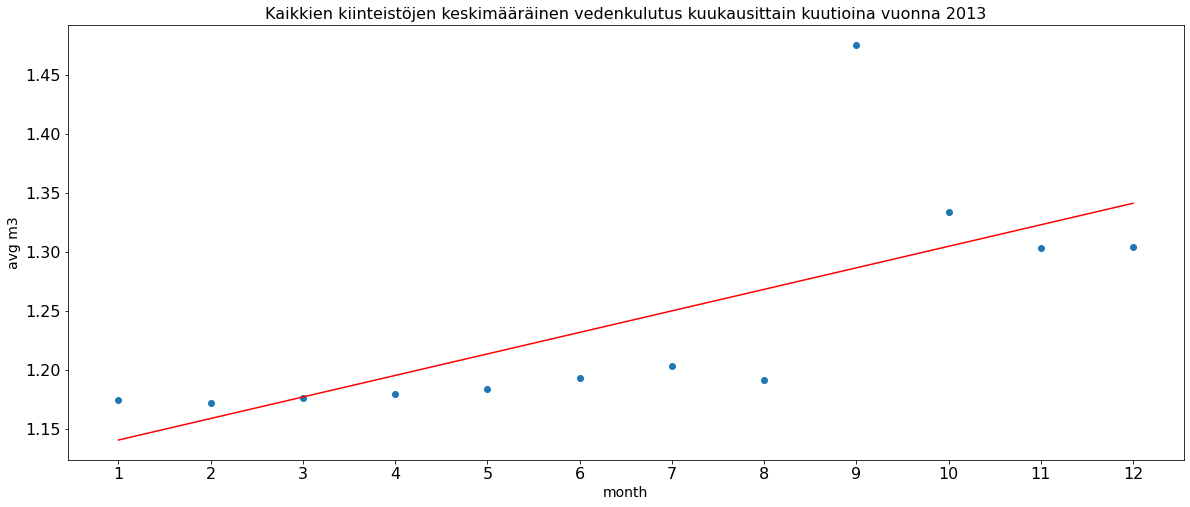

Kaikkien kiinteistöjen kulutuskeskiarvo on 0.17041533236293063 m3


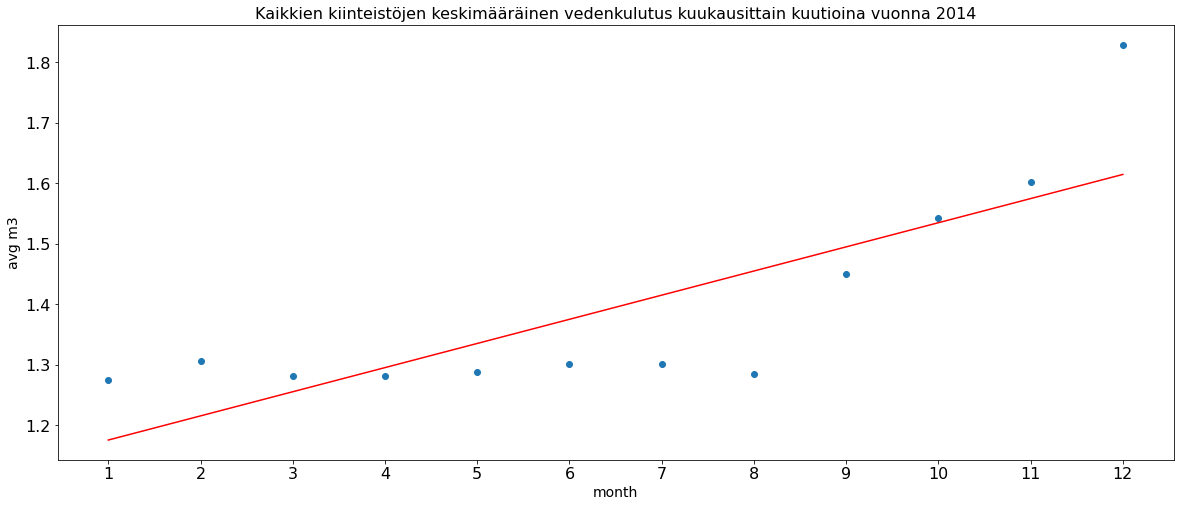

Kaikkien kiinteistöjen kulutuskeskiarvo on 0.17041533236293063 m3


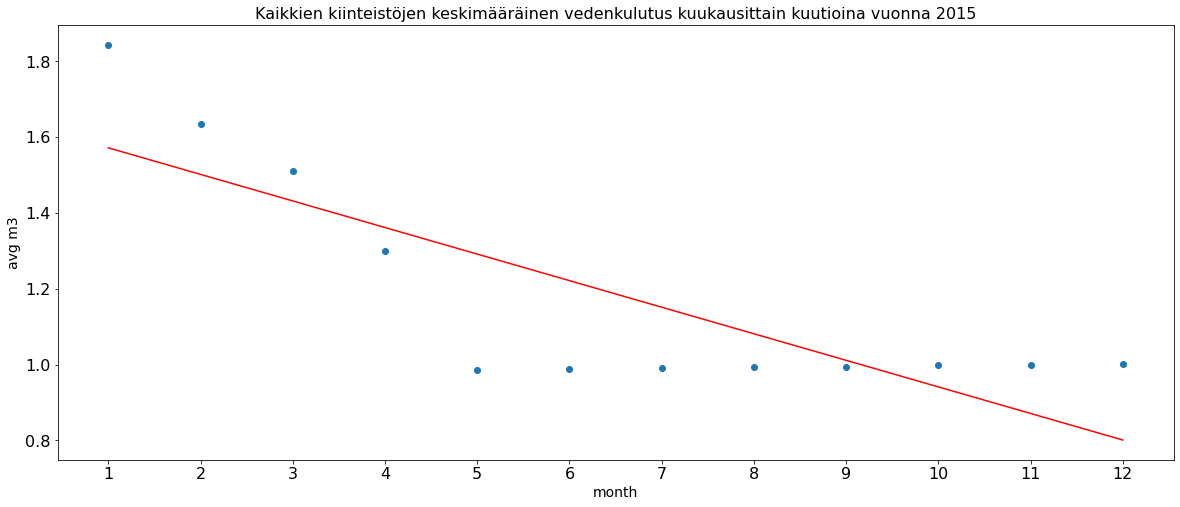

In [14]:
#  tässä dropataan vain suurin kuluttaja kiinteistö 163 mutta voisi dropata muitakin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
    
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
#----------------
df2.drop('163', axis=1, inplace=True)
#----------------
df2.replace(-1, 0, inplace=True) 

years=list((range(2012,2015+1))) ## oikeammin oliis filtteröidä eri vuodeT aineistostA

months=list(range(1,13))

def prog(year):

    def getMonthData(year):
        monthData=[]
        for month in months:
            data=df2.loc[(df2['Month'] == month) & (df2['Year'] == int(year))]                
            monthData.append(data.mean(numeric_only=True,axis=0).mean()) 
        return monthData

    x = np.array(months)
    y = np.array(getMonthData(year))

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    def myfunc(x):
        return slope * x + intercept

    mymodel = list(map(myfunc, x))

    fig1, ax = plt.subplots(1, 1, sharey=True,figsize=(20, 8))
    ax.xaxis.set_major_locator(plt.MaxNLocator(len(months)+1))
    
    ax.set_xlabel('month', size=14)
    ax.set_ylabel('avg m3', size=14)
    ax.set_title(f"Kaikkien kiinteistöjen keskimääräinen vedenkulutus kuukausittain kuutioina vuonna {year}",size=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.scatter(months, y)
    ax.plot(months, mymodel,color='red')
    print(f"Kaikkien kiinteistöjen kulutuskeskiarvo on {means.mean()} m3")
    plt.show()

print()    
prog(2012)
prog(2013)
prog(2014)
prog(2015)

Tässäpä ehkä hullu kokeilu, mutta kun ei voi tietää ennen kuin kokeilee voi vain arvailla jos sitäkään.
tsekataan onko kiinteistönumeroiniilla jotakin korrelaatiota kulutuksen

Tässä poistetaan aineistosta poikkemat, niiden olemassa olo vääristäsi tunnuslukuja huomattavasti, mutta niiden poissa olo kokonaan ei juurikaan vaikuta jöljellejäävän aineiston tunnuslukuihin, toki voitaisiin poikkeavat kulutusarvotkorvata jollakin esim. muiden keskiarvolla tai kokeile interpolaatiota.
Rajaksi on asetettu 1 m3, sen ylittävät poistetaan aineistosta, 

Kaikkien kiinteistöjen kulutuskeskiarvo on 0.17041533236293063 m3


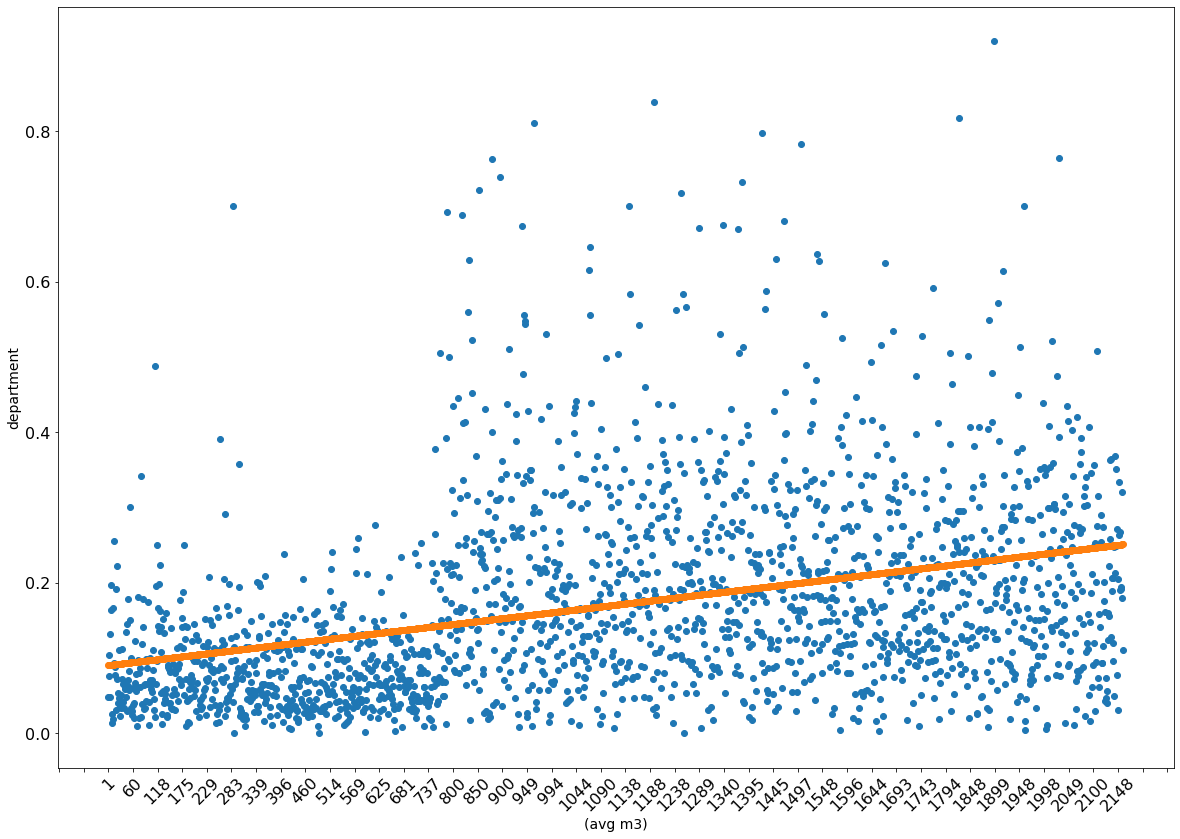

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
columnsToDrop = ['date', 'Year','Month', 'Day', 'Week', 'Weekday']
cols=df2.columns[1:-5]

for col in columnsToDrop:
    df2.drop(col, axis=1, inplace=True)

df2.replace(-1, 0, inplace=True)    
means=df2.mean().round(4)

toDrop=[]
ind=0
lim=1
for item in means:
    if item>=lim:

        toDrop.append(means.index[ind])
    ind+=1
    
for item in toDrop:
    means.drop(item,axis=0, inplace=True)
    cols=cols.drop(item)


import matplotlib.pyplot as plt
from scipy import stats

nbrs=list(range(1,len(cols)+1))

#x = np.array(nbrs[1000:1500])
#y = np.array(means[1000:1500])

x = np.array(nbrs)
#x = np.array(cols)
y = np.array(means)


slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

fig1, ax = plt.subplots(1, 1, sharey=True,figsize=(20, 14))
ax.xaxis.set_major_locator(plt.MaxNLocator(50))
ax.tick_params(axis='x', rotation=45)

ax.set_xlabel('(avg m3)', size=14)
ax.set_ylabel('department', size=14)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.scatter(cols, y)
ax.scatter(cols, mymodel)
print(f"Kaikkien kiinteistöjen kulutuskeskiarvo on {means.mean()} m3")


In [ ]:
Huom. x-akselilla olevat numerot ovat järjestysnumeroita (indeksi) DataFramessa, kiinteistönumeron saa tarvittaessa 
indeksin perusteella, mutta tässä tapauksessa ei ole merkitystä kun näytetään ylimalkainen "trendi".
Tämän perusteella näyttäis siltä, että keskimääräisesti kulutus hieman kasvaa kiinteistönumeron suhteen.
No tämä oli tällainen hullu kokeilu.

#### 6.4 * Ennustaminen?
Data-aineistoon perustuen voitaneen datamallin avulla ennustaa millainen kulutus on tiettynä ajanjaksona, jopa tiettynä viikonpäivä tai päivämäärällä.
Kappaleessa 6.1.2 on esitetty ennustamista.

#### 6.5 * Luokittelu?
Voidaan luokitella ajan suhteen sekä kulutuksen suhteen tiettyjen tunnuslukujen valossa.
Aineistossa on varmaankin eri kokoisia yksiköitä, kouluja, yrityksiä, hotelleja, kylpylöitä/uimahalleja, tehtaita, tuotantolaitoksia joiden kulutus poikkeaa suuresti tavanomaisesta asuinkulutuksesta.
Sanallinen luokittelu: pienkuluttajat, keskivertokuluttajat, suurkuluttajat tms.
Olisi siis hyvä saada lisätietoa kiinteistöistä niin luokittelu olisi mahdollista ja helpompaa.

Seuraavassa jaetaan mittadata-aineisto luokkiin kulutuksen mukaan, seuraavasta kuvasta päätelleen olen enimmäkseen silmämääräisesti jakanut luokkarajat, poikkeukset saavat oman luokkansa.

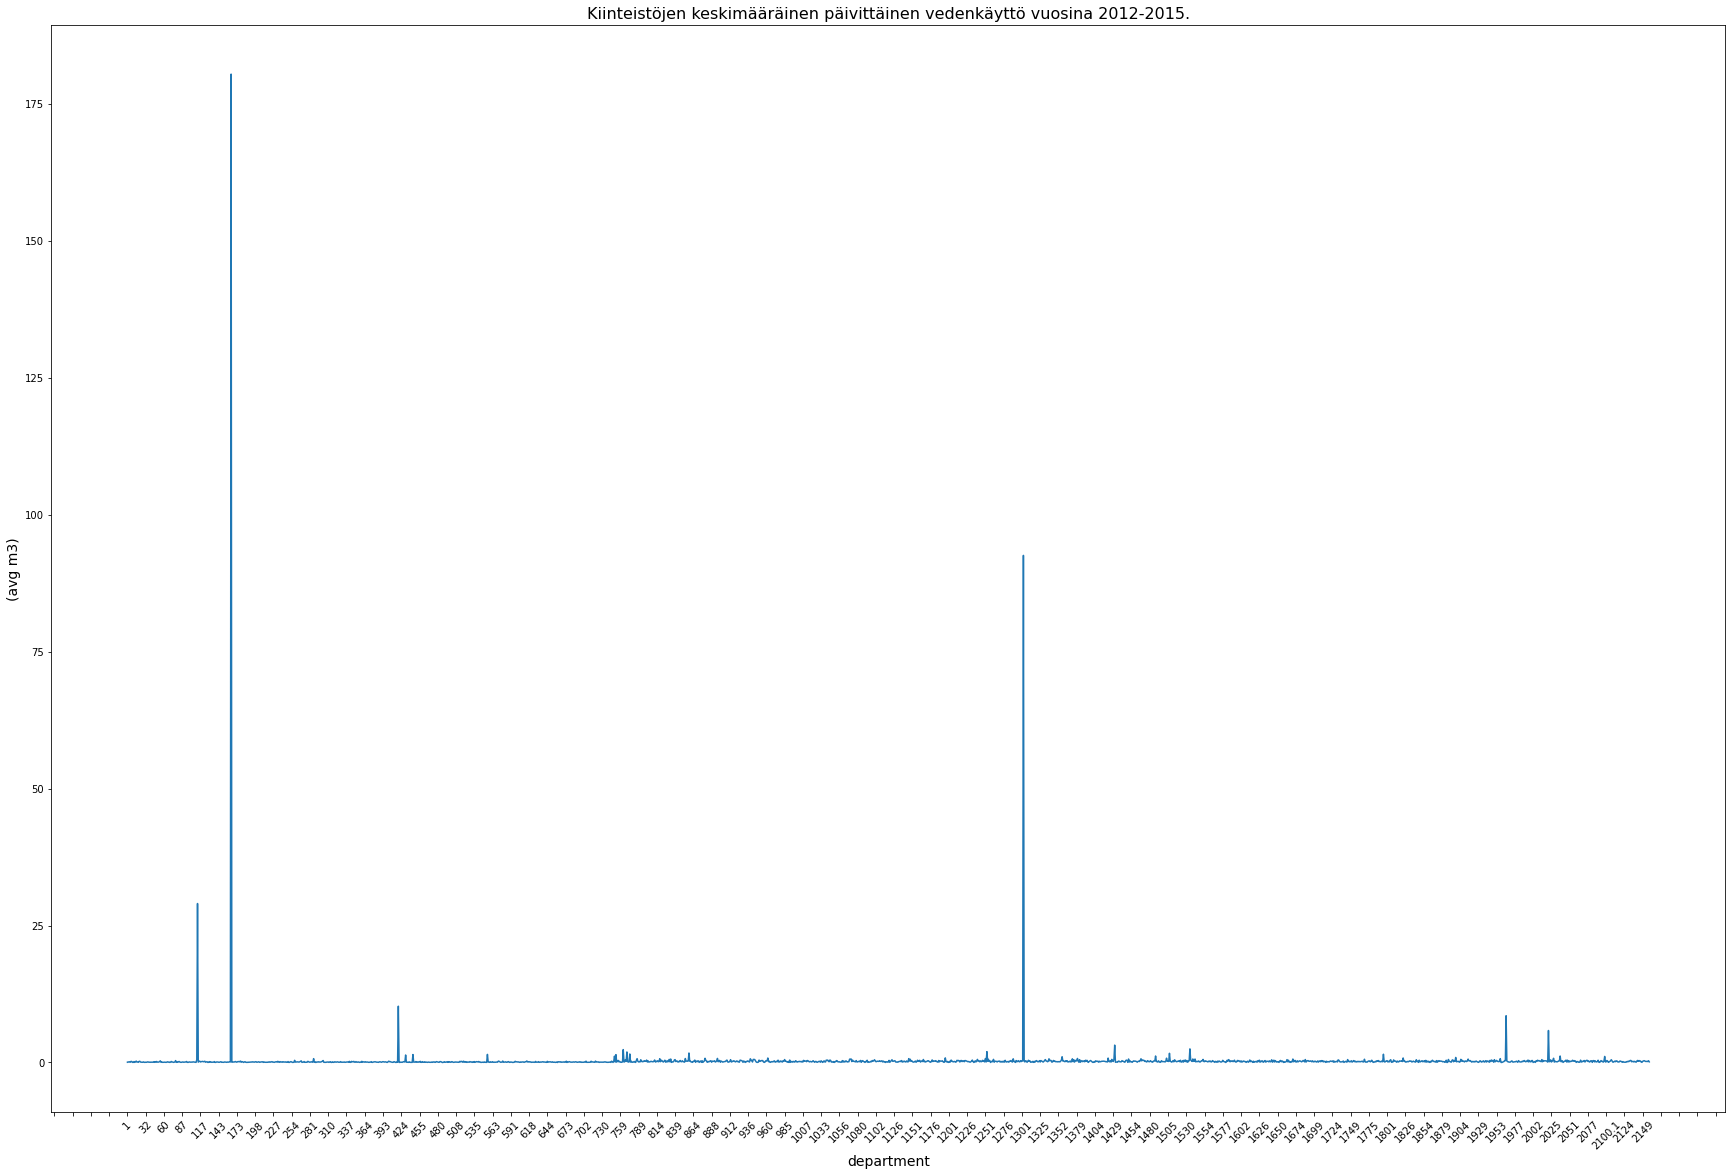

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
deleted_columns = ['date', 'Year','Month', 'Day', 'Week', 'Weekday']
cols=df2.columns[1:-5]

for column_name in deleted_columns:
    df2.drop(column_name, axis=1, inplace=True)

df2.replace(-1, 0, inplace=True)    
means=df2.mean().round(4)

fig1, ax = plt.subplots(1, 1, sharey=True,figsize=(30, 20))
#fig1, ax = plt.subplots(1, 1, sharey=False,figsize=(20, 14))
# keskiarvot kiinteistäjärjestyksessä
ax.set_ylabel('(avg m3)', size=14)
ax.set_xlabel('department', size=14)
#ax.set_xlim('2012-01-01', '2015-12-31')
ax.set_title('Kiinteistöjen keskimääräinen päivittäinen vedenkäyttö vuosina 2012-2015.', size=16)
# x-akselin labelit
ax.xaxis.set_major_locator(plt.MaxNLocator(100))
ax.tick_params(axis='x', rotation=45)
ax.plot(cols, means)

Sekä seuraavan tilaston, jossa kiinteistöjen kulutuskeskiarvot laitetaan järjestykseen suurimmasta pienimpään, tämän perusteella voidaan tehdä karkea luokkajako. 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
columnsToDrop = ['date', 'Year','Month', 'Day', 'Week', 'Weekday']
cols=df2.columns[1:-5]


for col in columnsToDrop:
    df2.drop(col, axis=1, inplace=True)

df2.replace(-1, 0, inplace=True)    
means=df2.mean().round(4)

#fig1, ax = plt.subplots(1, 1, sharey=True,figsize=(30, 20))
#print(means)

# suurimmasta pieninpään järjestykseen
result = means.argsort()
sortedMeans=means[result][::-1]
print(sortedMeans[:50])

163     180.4431
1303     92.5771
113      29.0190
419      10.2755
1965      8.5292
2021      5.8391
1431      3.1693
1535      2.4801
763       2.3512
1253      1.9785
768       1.9220
858       1.7298
1507      1.6760
772       1.5509
1795      1.5038
556       1.4748
445       1.4475
753       1.4284
433       1.3638
1488      1.1790
2038      1.1744
751       1.1555
2099      1.1019
1358      1.0443
1898      0.9197
1196      0.8385
1823      0.8177
962       0.8112
1422      0.7971
1503      0.7832
2028      0.7640
879       0.7635
896       0.7396
1380      0.7324
853       0.7221
1251      0.7177
288       0.7011
1146      0.7007
1958      0.7002
787       0.6919
818       0.6880
1468      0.6803
1338      0.6746
940       0.6745
1289      0.6707
1372      0.6696
1071      0.6461
1539      0.6372
1450      0.6296
834       0.6284
dtype: float64


In [ ]:
Kun kiinteistöjen kulutuskeskiarvot ovat näin järjestyksessä suurimmasta pienimpään, 
voidaan tämän perusteella tehdä karkea luokkajako. Seuraavassa ei sitä vielä tehdä vaan
esitetään juuri tehtyjen kulutusarvoluokkien kiinteistäjen lukumäärät kussakin luokassa.

<BarContainer object of 7 artists>

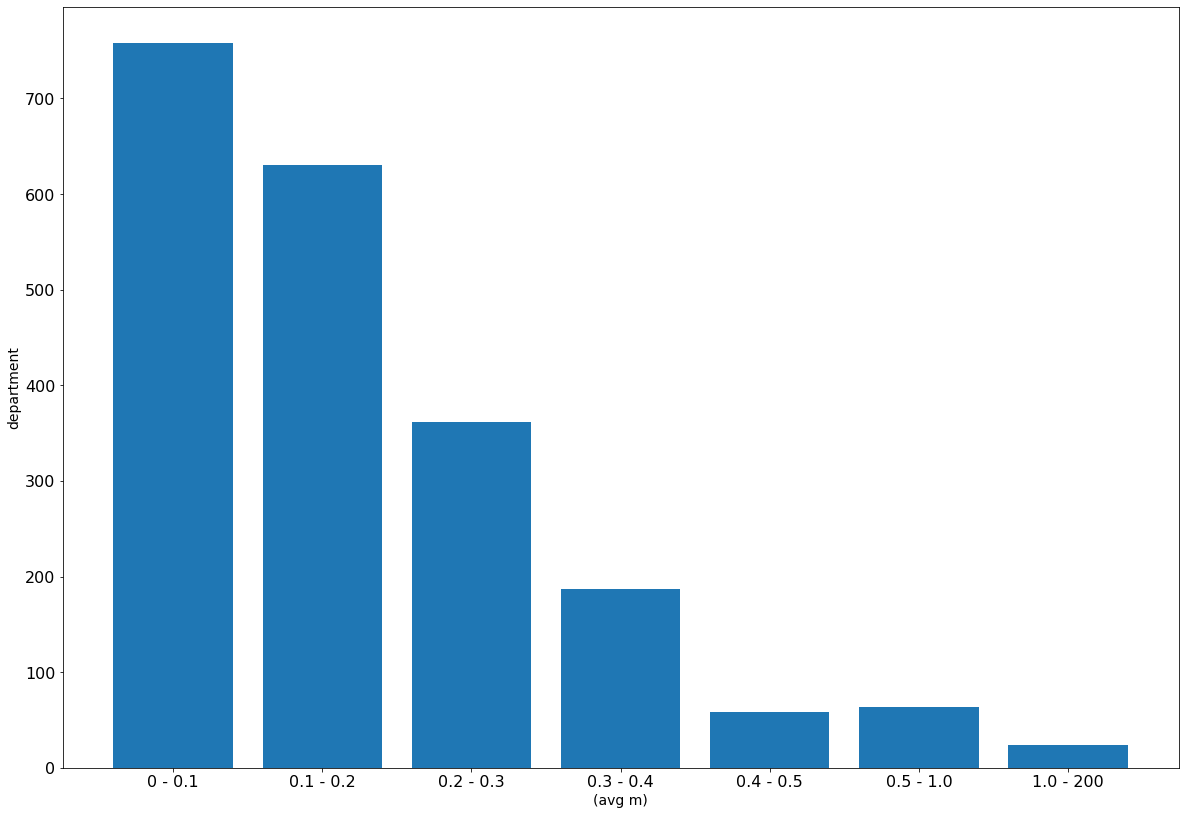

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
columnsToDrop = ['date', 'Year','Month', 'Day', 'Week', 'Weekday']
cols=df2.columns[1:-5]

for col in columnsToDrop:
    df2.drop(col, axis=1, inplace=True)

df2.replace(-1, 0, inplace=True)    
means=df2.mean().round(4)

# suurimmasta pieninpään järjestykseen
result = means.argsort()
sortedMeans=means[result][::-1]

sortedCols=cols[result][::-1]

means2=means.copy()
cols2=cols.copy()

limits=[0,0.1,0.2,0.3,0.4,0.5,1.0,200]
from collections import defaultdict
classes = defaultdict(list)

for i in range(0,len(limits)-1):                 
    
    #print(limits[i])
    ind=0
    for row in means2:
        start=limits[i]
        end=limits[i+1]
        if float(row)>float(start) and float(row)<=float(end):
           classes[str(start)+" - "+str(end)].append(means2.index[ind])
        ind+=1    

classx=[]
count=[]
for item in classes:    
    classx.append(item)
    count.append(len(classes[item]))

fig1, ax = plt.subplots(1, 1, sharey=True,figsize=(20, 14))
ax.set_xlabel('(avg m)', size=14)
ax.set_ylabel('department', size=14)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.bar(classx, count)
 

#### 6.6 * Ryhmittely?
Voidaan ryhmitellä eri aikajaksoihin, päivä, viikonpäivä, viikko, kk. vuosi
Pandas dataframen metodilla groupby voidaan tehdä ryhmittelyä kuten seuraava esimerkki osoittaa ryhmittelyn vuosien suhteen.

In [17]:
import numpy as np
df2=df.copy()
df2.replace(-1, 0, inplace=True)

cols=df2.columns[1:-5]

df3=df2.groupby("Year")[cols].agg([np.sum, np.mean, np.std, np.min, np.max])
display(df3)

1                                          2                      \
         sum      mean       std   amin   amax      sum      mean       std   
Year                                                                          
2012   0.000  0.000000  0.000000  0.000  0.000    0.000  0.000000  0.000000   
2013  15.638  0.042844  0.065834  0.000  0.218   33.559  0.091942  0.163543   
2014  48.372  0.132526  0.038599  0.071  0.321  103.523  0.283625  0.166320   
2015   5.932  0.016252  0.046959  0.000  0.235   14.095  0.038616  0.122960   

                  ...     2157                                    2158  \
     amin   amax  ...      sum      mean       std amin   amax     sum   
Year              ...                                                    
2012  0.0  0.000  ...  109.179  0.298303  0.228639  0.0  1.025  24.540   
2013  0.0  0.639  ...  151.756  0.415770  0.191202  0.0  1.111  58.445   
2014  0.0  1.115  ...  153.646  0.420948  0.187209  0.0  1.224  60.536   
2015  0.0  0.867  ...   53.083  0.145433  0.246533  0.0  1.446  18.367   

                                        
          mean       std   amin   amax  
Year                                    
2012  0.067049  0.083402  0.000  0.387  
2013  0.160123  0.049945  0.051  0.347  
2014  0.165852  0.050690  0.030  0.415  
2015  0.050321  0.081367  0.000  0.346  

[4 rows x 10425 columns]

Seuraavassa ryhmittely on tehty sattumanvaraisesti valittujen kiinteistöjen yhteenlasketuista kokonaiskulutuksita eri vuosina pylväsdiagrammeina. Voidaan havainnollisesti nähdä kunkin kiinteistön osalta miten niiden kulutus on muuttunut eri vuosina.

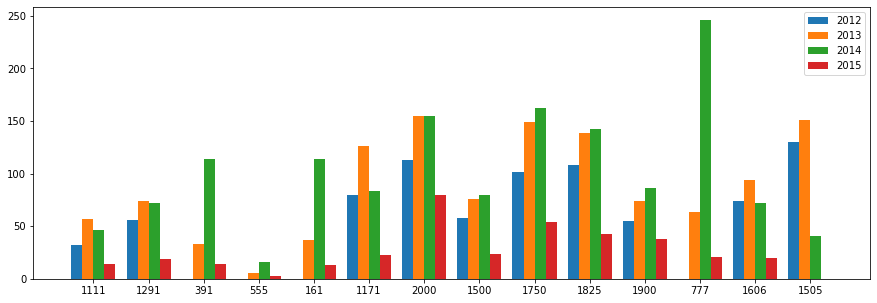

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data/Yorkshire_external_meters_2012_2015.csv", index_col=0)
df2=df.copy()
df2.replace(-1, 0, inplace=True)
#date_col = df2['date']
columnsToDrop = ['date', 'Month', 'Day', 'Week', 'Weekday']
for col in columnsToDrop:
    df2.drop(col, axis=1, inplace=True)


years=[2012,2013,2014,2015]

# tee funktio years parametriksi
year_sum=[]
for year in years:
    sum=df2[(df2['Year'] == year)].sum()
    year_sum.append(sum)

import numpy as np 
import matplotlib.pyplot as plt 
#RANDOM
dept= ['1111','1291','391','555','161','1171','2000','1500','1750','1825','1900','777','1606','1505']

def getYearData(sum,dept):    
    ret=[]    
    for item in dept:
        ret.append(sum[item]) 
    return ret

year2012 = getYearData(year_sum[0],dept)
year2013 = getYearData(year_sum[1],dept)
year2014 = getYearData(year_sum[2],dept)
year2015 = getYearData(year_sum[3],dept)

x_axis = np.arange(len(dept))

plt.rcParams["figure.figsize"] = (15,5)
plt.bar(x_axis -0.3, year2012, width=0.2, label = '2012')
plt.bar(x_axis -0.1, year2013, width=0.2, label = '2013')
plt.bar(x_axis +0.1, year2014, width=0.2, label = '2014')
plt.bar(x_axis +0.3, year2015, width=0.2, label = '2015')

plt.xticks(x_axis, dept)

plt.legend()

plt.show()

#### 6.7 * Ryhmien tunnistaminen datasta?

 Onko kiinteistöt .1 .2 jne. ryhmä?
 Ryhmiä tunnistetaan erilisilla data-analytiikan metodeilla ja laskennallisilla menetelmillä.


  
#### 6.8 * Mitä tämän jälkeen tapahtuu CRISP-DM -mallin mukaan (pääpiirteissään)
Testausta, tarkastelua ja arviontia. Tämän jälkeen käyttöönoton suunnittelua ja sen toteuttamista. Myös dokumentointia/raportointia käyttöhjeita/ongelmatilanteiden hallinta. 
Kehitetään iteroidaan yhä paremmaksi hyödyntäen aikaisemmin opittua.
Myös mahdollisesti otetaan askelia taaksepäin ja tarkastellaan voidaanko jotakin tehdä paremmin kaikissa prosessin eri vaiheissa.